In [1]:
import pandas  as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
fashion_test_df = pd.read_csv('fashion/fashion-mnist_test.csv',sep=",")

In [5]:
fashion_train_df = pd.read_csv('fashion/fashion-mnist_train.csv',sep=",")

In [6]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [9]:
fashion_train_df.shape

(60000, 785)

In [10]:
fashion_test_df.shape

(10000, 785)

In [11]:
training = np.array(fashion_train_df,dtype='float32')

In [12]:
testing=np.array(fashion_test_df,dtype='float32')

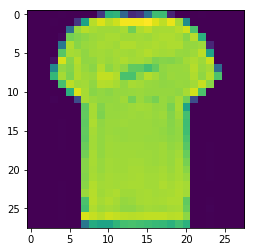

In [13]:
plt.imshow(training[10,1:].reshape(28,28))

In [14]:
import random

2.0

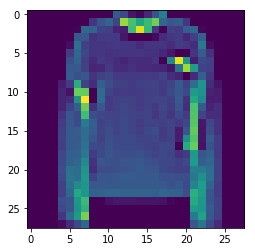

In [15]:
plt.imshow(training[random.randint(0,5999),1:].reshape(28,28))
lable = training[random.randint(0,5999),0]
lable

In [16]:
w_grid =15

In [17]:
l_grid =15

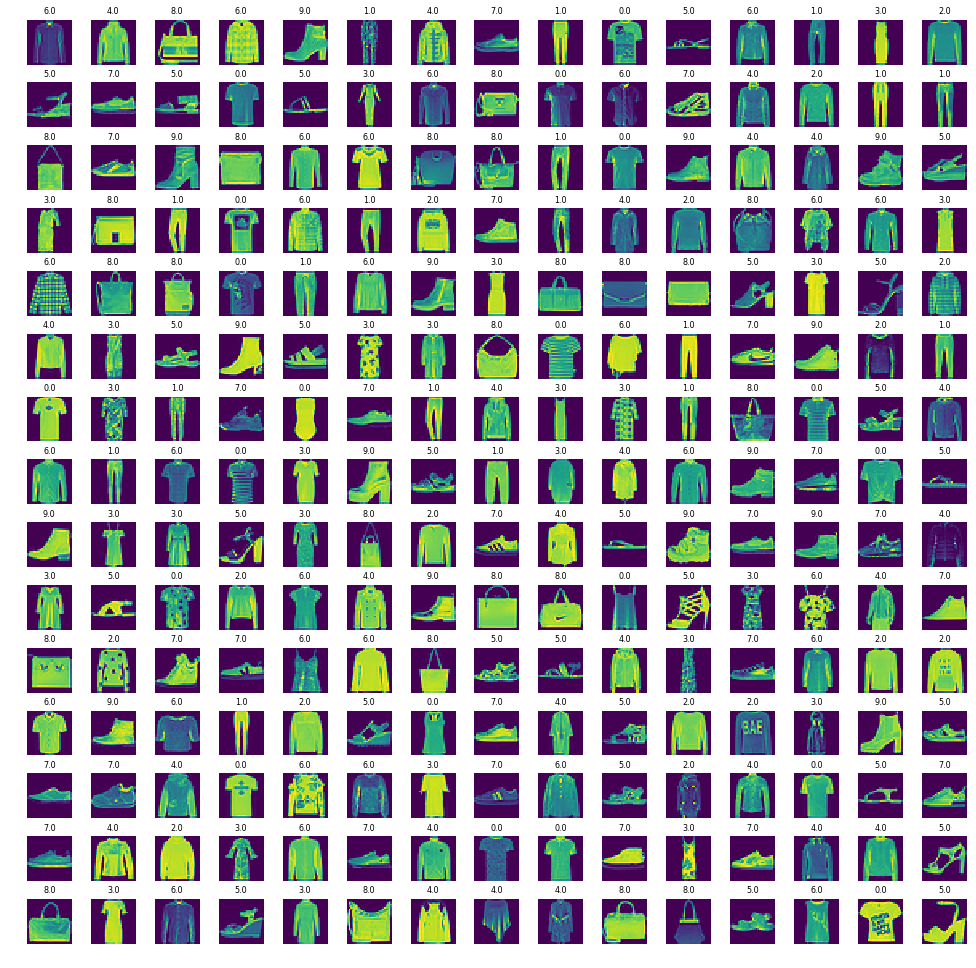

In [18]:
fig,axes = plt.subplots(l_grid,w_grid,figsize=(17,17))
axes = axes.ravel()
n_training= len(training)
for i in np.arange(0,w_grid*l_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0],fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)    

In [19]:
#train our model
X_train = training[:,1:]/255

In [20]:
y_train = training[:,0]

In [22]:
X_test = testing[:,1:]/255
y_test = testing[:,0]


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_validate,y_train,y_validate = train_test_split(X_train,y_train,test_size = 0.2,random_state =12345)

In [25]:
X_train.shape

(48000, 784)

In [26]:
X_validate.shape[0]

12000

In [27]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [28]:
X_train.shape

(48000, 28, 28, 1)

In [29]:
X_train

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [30]:
X_test.shape

(10000, 28, 28, 1)

In [31]:
X_validate.shape

(12000, 28, 28, 1)

In [32]:
import keras

Using TensorFlow backend.


In [33]:
from keras.models import Sequential

In [34]:
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [35]:
from keras.optimizers import Adam

In [36]:
from keras.callbacks import TensorBoard

In [37]:
cnn_model = Sequential()

In [38]:
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1),activation ='relu'))

C:\Users\india\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [39]:
cnn_model.add(MaxPooling2D(pool_size =(2,2)))

In [40]:
cnn_model.add(Flatten())

In [41]:
cnn_model.add(Dense(output_dim =32,activation ='relu'))
cnn_model.add(Dense(output_dim =10,activation ='sigmoid'))

C:\Users\india\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.
C:\Users\india\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [42]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy',optimizer =Adam(lr=0.001),metrics=['accuracy'])

In [43]:
epochs = 50 #no of repeatition

In [44]:
cnn_model.fit(X_train,y_train,
             batch_size = 512,
             nb_epoch = epochs,
             verbose=1,validation_data=(X_validate,y_validate))

C:\Users\india\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 9s 192us/step - loss: 1.0572 - acc: 0.6008 - val_loss: 0.5391 - val_acc: 0.8102
Epoch 2/50
48000/48000 [==============================] - 8s 162us/step - loss: 0.4773 - acc: 0.8307 - val_loss: 0.4344 - val_acc: 0.8463
Epoch 3/50
48000/48000 [==============================] - 8s 162us/step - loss: 0.4170 - acc: 0.8529 - val_loss: 0.3966 - val_acc: 0.8608
Epoch 4/50
48000/48000 [==============================] - 8s 161us/step - loss: 0.3861 - acc: 0.8649 - val_loss: 0.3638 - val_acc: 0.8722
Epoch 5/50
48000/48000 [==============================] - 8s 162us/step - loss: 0.3582 - acc: 0.8751 - val_loss: 0.3576 - val_acc: 0.8752
Epoch 6/50
48000/48000 [==============================] - 8s 163us/step - loss: 0.3444 - acc: 0.8801 - val_loss: 0.3427 - val_acc: 0.8805
Epoch 7/50
48000/48000 [==============================] - 8s 162us/step - loss: 0.3281 - acc: 0.8854 - val_loss: 0.3336 - 

In [46]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy:{:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 92us/step
Test Accuracy:0.913


In [47]:
predicted_classes= cnn_model.predict_classes(X_test)

In [48]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

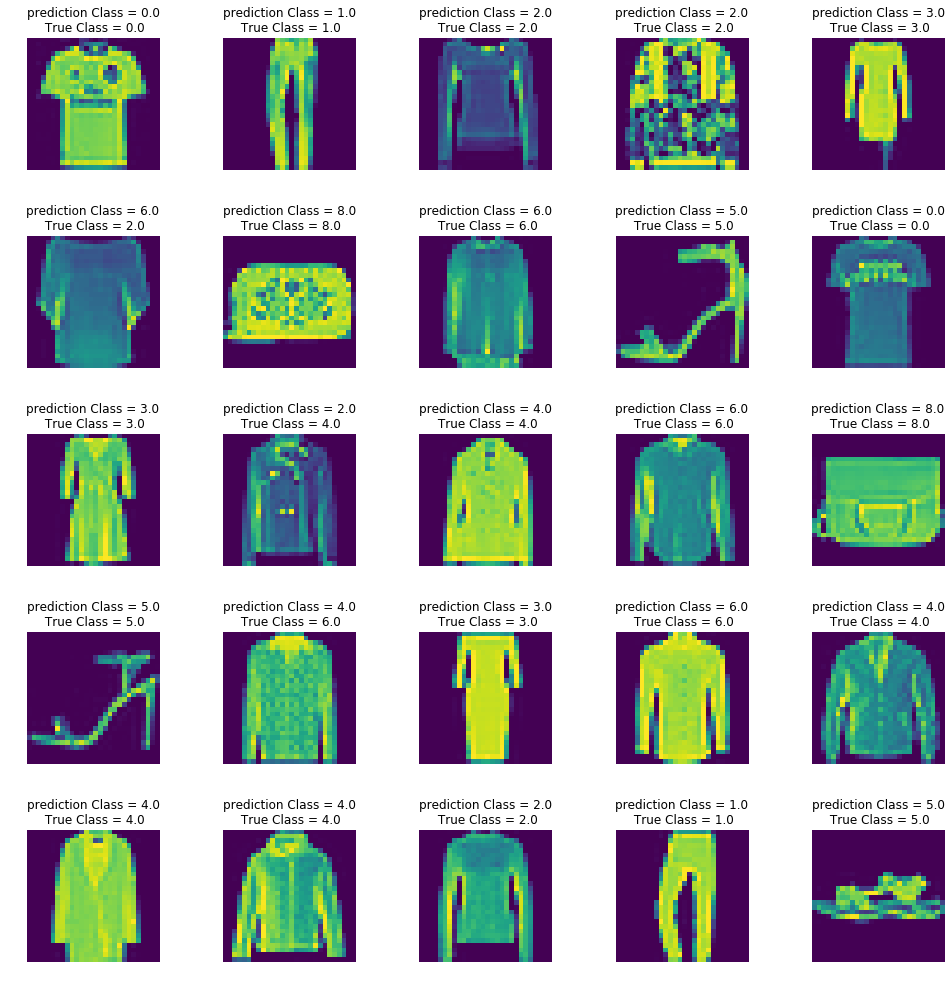

In [49]:
l=5
w=5

fig,axes = plt.subplots(l,w,figsize=(17,17))
axes = axes.ravel()

for i in np.arange(0,w*l):
    
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.5)   

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cm= confusion_matrix(y_test,predicted_classes)

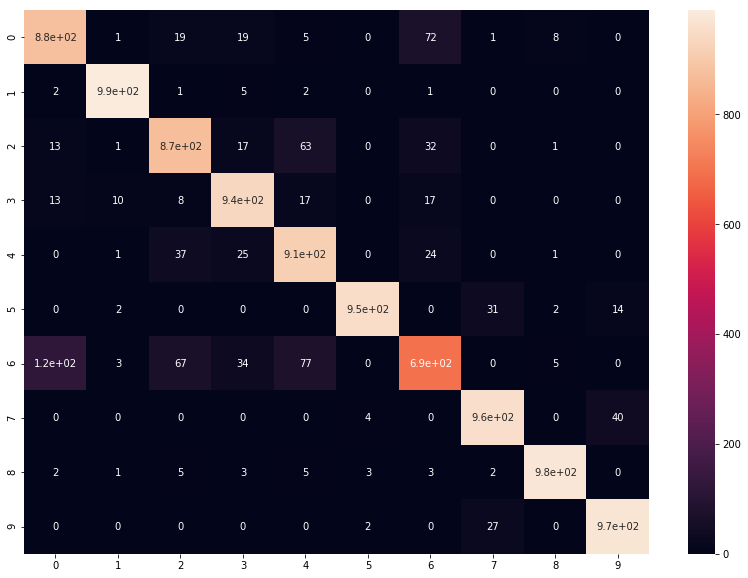

In [55]:
plt.figure(figsize = (14,10))
sns.heatmap(cm,annot=(True))

In [56]:
from sklearn.metrics import classification_report

In [58]:
num_classes =10
target_names = ["Classes {}".format(i) for  i in range(num_classes)]
print(classification_report(y_test,predicted_classes,target_names=target_names))

              precision    recall  f1-score   support

   Classes 0       0.85      0.88      0.86      1000
   Classes 1       0.98      0.99      0.99      1000
   Classes 2       0.86      0.87      0.87      1000
   Classes 3       0.90      0.94      0.92      1000
   Classes 4       0.84      0.91      0.88      1000
   Classes 5       0.99      0.95      0.97      1000
   Classes 6       0.82      0.69      0.75      1000
   Classes 7       0.94      0.96      0.95      1000
   Classes 8       0.98      0.98      0.98      1000
   Classes 9       0.95      0.97      0.96      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
#improving the model
